In [4]:
import collections
import glob
import os
import numpy as np

In [6]:
# Extracting data from the txt files and appending them into mails and labelling whether the files are spam or not
mails,labels=[],[]
file_path_spam ="/home/anilatmaj/PycharmProjects/pythonProject/enron1/spam/"
file_path_legit ="/home/anilatmaj/PycharmProjects/pythonProject/enron1/ham/"
for filename_spam in glob.glob(os.path.join(file_path_spam ,'*.txt')):
    with open(filename_spam,'r',encoding="ISO-8859-1") as infile:
        mails.append(infile.read())
        labels.append(1)
for filename_legit in glob.glob(os.path.join(file_path_legit,'*.txt')):
    with open(filename_legit,'r',encoding="ISO-8859-1") as infile:
        mails.append(infile.read())
        labels.append(0)
print("Total number of emails: "+str(len(mails))+"\nTotal number of labels: "+str(len(labels)))

Total number of emails: 5172
Total number of labels: 5172


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import names

lemmatizer = WordNetLemmatizer()
cv= CountVectorizer(stop_words="english", max_features=750)
all_names = set(names.words())
def onlyLetters(word):
    return word.isalpha()
def clean_text(docs):
    cleaned_docs=[]
    for doc in docs:
        cleaned_docs.append(' '.join( [ lemmatizer.lemmatize(word.lower()) for word in doc.split() if onlyLetters(word) and word not in all_names ] ) )
    return cleaned_docs
def get_label_index(labels):
    label_index= collections.defaultdict(list)
    for index, label in enumerate(labels):
        label_index[label].append(index)
    return label_index
def get_prior(label_index):
    prior = {label: len(index) for label, index in label_index.items()}
    totalCount= sum(prior.values())
    for label in prior:
        prior[label]/= totalCount
    return prior

In [9]:
cleaned_emails= clean_text(mails)

term_docs = cv.fit_transform(cleaned_emails) #This converts the cleaned text(row of words) into a term document matrix where each row is a term frequency sparse vector
#it will be in the format of (row index, feature/term index) value(term frequency in that document)
feature_names=cv.get_feature_names_out()
feature_count=term_docs.toarray().sum(axis=0) #sparse matrix of all the term count getting converted to term frequency
label_index = get_label_index(labels)
print(term_docs[0,:].sum(axis=0))
prior = get_prior(label_index)
print(prior)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 

{'able': 246, 'access': 239, 'account': 378, 'accounting': 176, 'act': 221, 'action': 154, 'activity': 379, 'acton': 144, 'actual': 296, 'actuals': 330}


/home/anilatmaj/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


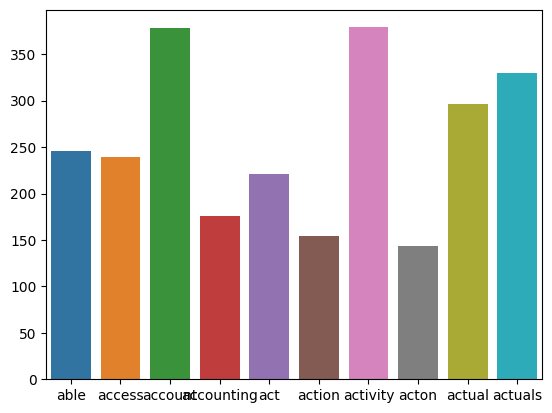

In [10]:
import seaborn as sb
import matplotlib.pyplot as plt
feature_graph = {fname : frequency for fname,frequency in zip(feature_names[0:10],feature_count[0:10])}
print(feature_graph)
sb.barplot(y=list(feature_graph.values()),x=list(feature_graph.keys()))
plt.xlabe="Feature names"
plt.ylabel="Feature frequency"

In [12]:
def get_likelihood(term_doc_matrix,label_index,smoothing=0):
    likelihood={}
    for label, index in label_index.items():
        likelihood[label] = term_doc_matrix[index,:].sum(axis=0) + smoothing
        likelihood[label] = np.asarray(likelihood[label]) [0]
        total_count= likelihood[label].sum()
        likelihood[label]=likelihood[label]/float(total_count)
    return likelihood
smoothing =1
likelihood = get_likelihood(term_docs,label_index,smoothing)

print(len(likelihood[0])) #total num of features
print(likelihood[0][0:10]) #likelihood of first 10 features of not spam P(feature |not spam)
print(likelihood[1][0:10]) #likelihood of first 10 features of spam P(feature | spam)


750
[9.72500673e-04 8.57795466e-04 7.87974904e-04 7.58051807e-04
 8.97692929e-05 2.14448866e-04 1.76546276e-03 7.18154343e-04
 1.20191109e-03 1.65075755e-03]
[8.95890735e-04 1.16634832e-03 3.75259893e-03 4.39493568e-04
 3.46523775e-03 1.91010666e-03 4.56397167e-04 3.38071976e-05
 9.63505130e-04 1.69035988e-05]


In [13]:
def get_posterior(term_doc_matrix, prior, likelihood):
    posteriors = []
    num_docs = term_doc_matrix.shape[0]
    for i in range(num_docs):
        posterior = {key: np.log(prior_label) for key, prior_label in prior.items()}
        for label, likelihood_label in likelihood.items():
            term_doc_vector = term_doc_matrix.getrow(i)
            counts = term_doc_vector.data
            indices = term_doc_vector.indices
            for count, index in zip(counts, indices):
                posterior[label] += np.log(likelihood_label[index] * count)
        # exp(-1000):exp(-999) will cause zero division error,
        # however it equates to exp(0):exp(1)
        min_log_posterior = min(posterior.values())
        for label in posterior:
            try:
                posterior[label] = np.exp(posterior[label] - min_log_posterior)
            except:
                posterior[label] = float('inf')
        sum_posterior = sum(posterior.values())
        for label in posterior:
            if posterior[label] == float('inf'):
                posterior[label] = 1.0
            else:
                posterior[label] /= sum_posterior
        posteriors.append(posterior.copy())
    return posteriors




In [14]:
emails_test=['''Subject: flat screens

Hello,

Please call or contact regarding the other flat screens requested.

Trisha Tlapek - EB 3132 B
Michael Sergeev - EB 3132 A

Also the sun blocker that was taken away from EB 3131 A.
Trisha should two monitors also Michael.

Thanks,
Kevin Moore''','''Subject: having problems in bed? we can help!

Cialis allows men to enjoy a fully normal sex life without having to plan the sexual act.

If we let things terrify us, life will not be worth living.
Brevity is the soul of lingerie.
Suspicion always haunts the guilty mind.''']
cleaned_test= clean_text(emails_test)
term_docs_test=cv.transform(cleaned_test)
posterior_test= get_posterior(term_docs_test,prior,likelihood)
print(posterior_test)

[{1: 0.339723092321108, 0: 0.660276907678892}, {1: 0.9991787730883056, 0: 0.0008212269116944165}]


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(cleaned_emails,labels,test_size=0.33,random_state=42)
len(X_train), len(Y_train)

(3465, 3465)

In [17]:
term_docs_train=cv.fit_transform(X_train)
label_index_train = get_label_index(Y_train)
prior = get_prior(label_index_train)
likelihood= get_likelihood(term_docs_train , label_index_train, smoothing)

In [18]:
term_docs_test= cv.transform(X_test)
posterior_test= get_posterior(term_docs_test,prior,likelihood)

In [19]:
correct=0.0
predarr=list()
actualarr=list()
for pred, actual in zip(posterior_test,Y_test):
    actualarr.append(actual)
    predval= 0 if pred[0]>pred[1] else 1
    predarr.append(predval)
    if actual==1:
        if pred[1] >=0.5:
            correct+=1
    elif pred[0] >= 0.5:
        correct+=1
print('The accuracy on {0} testing samples is: {1:.1f}%'.format(len(Y_test), correct/len(Y_test)*100))

The accuracy on 1707 testing samples is: 93.2%


In [20]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(actualarr,predarr)
cm
print(cm.shape)
cm

(2, 2)


array([[1122,   69],
       [  47,  469]])

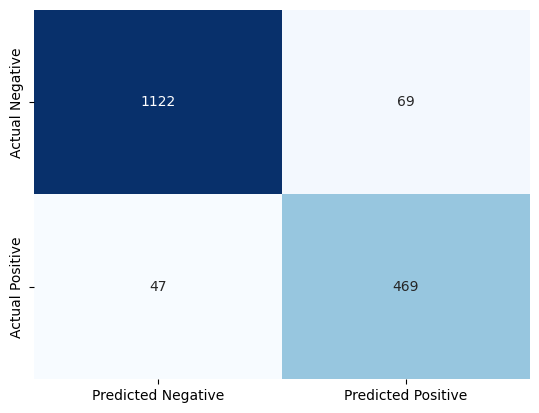

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.heatmap(cm, fmt='d',annot=True, cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.show()


In [35]:
from sklearn.metrics import classification_report

print(classification_report(actualarr,predarr))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1191
           1       0.87      0.91      0.89       516

    accuracy                           0.93      1707
   macro avg       0.92      0.93      0.92      1707
weighted avg       0.93      0.93      0.93      1707

